# The Relationship Between Tree Diameter and Growth Environment

## Introduction

This project involves using the diameter of a common tree species in Vancouver, compared between different streets. These streets are of interest because some of our group members reside on them, so we were interested in determining what would be the diameter of this common tree species that is very populated here in Vancouver, British Columbia.

### Background information

The diameter of a tree’s trunk reveals the growth of a tree and is closely relative to the surrounding environment. Trees need water, sunlight and carbon dioxide to produce nutrients for themselves so that they can use the chemical energy to grow in height and girth(diameter). The growth of the trunk's diameter usually happens after the primary growth; for a tree, primary growth is responsible for the height of a tree and the depth of its root (Cavallo-Medve, et al., 1971). After the primary growth or at the meanwhile, the secondary growth takes place. The secondary growth will develop in the width (diameter) of a tree’s trunk. In this research, we are comparing the same kind of tree (Magnolia) on different streets, aiming to observe whether there exists a potential environmental influence on the trees. According to Berlyn (2022), “Tree height is closely associated with the quality of the site on which the tree is growing (i.e., the climate, soil topography, and biota), radial growth is tied more to the weather conditions of the current year. 

### What is your (inferential) research question?

Do the Magnolia trees on Charles street differ in diameter from the diameters of the Magnolia trees on Churchill street?
 
### What is your population of interest?

Magnolia trees on Charles St. and Churchill St.

### How do you collect your data?

City of Vancouver Open Data Portal

### What is your point estimate? (e.g., mean difference between male and female income, proportions of Democrats voters, etc.)

Mean difference between Magnolia trees’ diameters on Charles St. and Churchill St.

### Hypothesis

Null hypothesis ($H_0$): there is no difference for the trees’ diameter when planting in different streets

Alternate hypothesis ($H_a$): trees’ diameter will be affected when planting in different streets

$H_0\text{: }\mu_1 = \mu_2$

$H_a\text{: }\mu_1 \neq \mu_2$


## Preliminary Results

In [21]:
library(tidyverse)
library(cowplot)
library(infer)

The data is loaded from a URL stored in the `url` variable. We mirrored the dataset to our git repository for faster, easier access, organization, and reproducibility. The original is available at [this link](https://opendata.vancouver.ca/explore/dataset/street-trees/download/?format=csv&timezone=America/Los_Angeles&lang=en&use_labels_for_header=true&csv_separator=%3B).

In [22]:
url <- "https://github.com/armanmoztar/stat-201-group7/raw/main/data.csv"

The data is read and filtered to include only the relevant columns and populations.

In [23]:
magnolia_trees <- read_delim(url, delim = ";") |>
    filter(GENUS_NAME == "MAGNOLIA") |>
    select(street = STD_STREET, diameter = DIAMETER) |>
    filter(street %in% c("CHARLES ST", "CHURCHILL ST"))

head(magnolia_trees)

Rows: 149937 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr  (13): STD_STREET, GENUS_NAME, SPECIES_NAME, CULTIVAR_NAME, COMMON_NAME,...
dbl   (5): TREE_ID, CIVIC_NUMBER, ON_STREET_BLOCK, HEIGHT_RANGE_ID, DIAMETER
date  (1): DATE_PLANTED

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


street,diameter
<chr>,<dbl>
CHURCHILL ST,3
CHURCHILL ST,3
CHURCHILL ST,3
CHURCHILL ST,3
CHURCHILL ST,3
CHURCHILL ST,2


We estimate our population parameter from our sample and present it in a table for each street.

In [24]:
magnolia_tree_means <- magnolia_trees |>
    group_by(street) |>
    summarise(mean = mean(diameter))

magnolia_tree_means

street,mean
<chr>,<dbl>
CHARLES ST,12.338710
CHURCHILL ST,3.744792


The data is presented as two histograms comparing the diameter of the trees between the two streets, as well as the mean represented by the red line.

Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


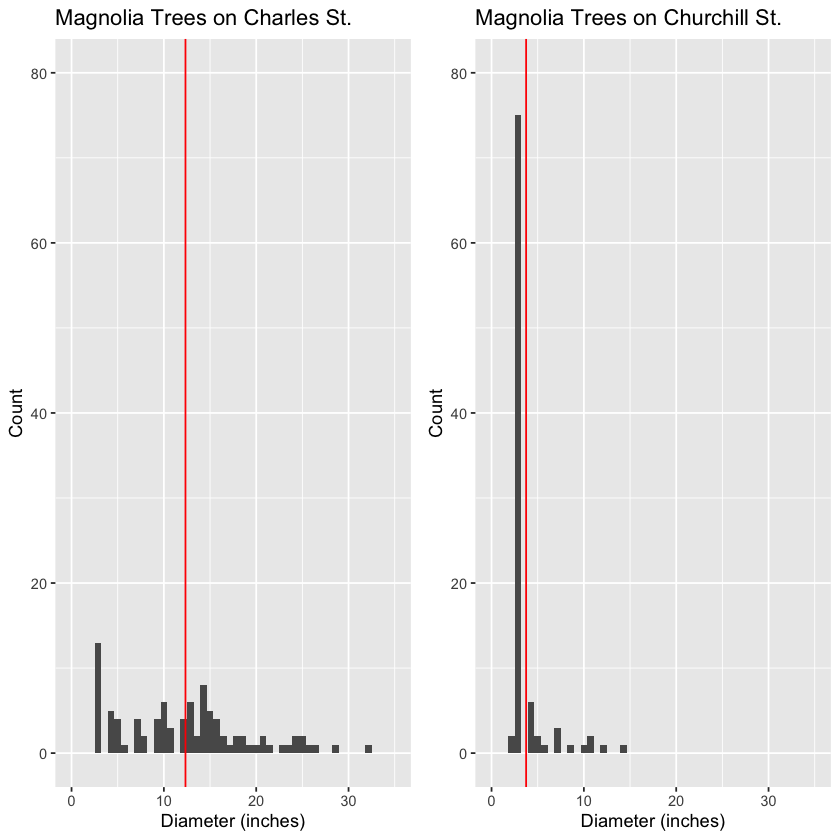

In [25]:
charles_st_trees_graph <- magnolia_trees |>
    filter(street == "CHARLES ST") |>
    ggplot(aes(x = diameter)) +
    geom_histogram(bins = 50) +
    geom_vline(xintercept = filter(magnolia_tree_means, street == "CHARLES ST")$mean, color = "red") +
    xlim(0, 35) +
    ylim(0, 80) +
    ggtitle("Magnolia Trees on Charles St.") +
    labs(x = "Diameter (inches)", y = "Count")

churchill_st_trees_graph <- magnolia_trees |>
    filter(street == "CHURCHILL ST") |>
    ggplot(aes(x = diameter)) +
    geom_histogram(bins = 50) +
    geom_vline(xintercept = filter(magnolia_tree_means, street == "CHURCHILL ST")$mean, color = "red") +
    xlim(0, 35) +
    ylim(0, 80) +
    ggtitle("Magnolia Trees on Churchill St.") +
    labs(x = "Diameter (inches)", y = "Count")

plot_grid(charles_st_trees_graph, churchill_st_trees_graph)

## Methods (plan)

Point of estimate: the sample means of the Magnolia trees’ diameters on Charles street(1) and Churchill Street(2)

Two-sample t-test with independent populations

### Test statistic

$$
\begin{align*}
\text{Test Statistic} & = \frac{\overline{\mu_1} - \overline{\mu_2}}{\sqrt{\frac{{s_1}^2}{n_1} + \frac{{s_2}^2}{n_2}}}
\\
\text{df} & = \frac{(\frac{{s_1}^2}{n_1} + \frac{{s_2}^2}{n_2})^2}{\frac{{s_1}^4}{{n_1}^2 (n_1 - 1)} + \frac{{s_2}^4}{{n_2}^2 (n_2 - 1)}}
\end{align*}
$$

### Significance level

5% significance level, two-tailed hypothesis test

Use null hypothesis test to compare the diameter of the Magnolia trees growing on Charles street and Churchill street

### Expectations

Expect to find differences between two locations, since the distance between the two streets are over 10 km apart, and different streets may have different environments for the growth of the trees.

### Potential drawbacks

We are comparing the same kind of trees (Magnolia) in two different streets, it can also be considered as a paired (dependent) two-sample t-test. However, because the individual trees' growth are independent from each other, we decide to use the independent two-sample t-test here.

### Reproducible analysis

All the codes used in this research can be reproduced to study another kind of tree or use a different set of streets.

## References

Everett, T. H., Berlyn, . Graeme Pierce and Weber, . Lillian M. (2022, September 21). tree. Encyclopedia Britannica. https://www.britannica.com/plant/tree

Cavallo-Medved, D., Fenton, M., Milson, B., Riskin, S., Wilson, K. (1971). Life Matters: Connecting Biology to Your World (1st ed., chapter 17). Tophatmonocle Corp.

City of Vancouver (2022, November 3). Street trees. City of Vancouver, Vancouver Board of Parks and Recreation. https://opendata.vancouver.ca/explore/embed/dataset/street-trees/table/?disjunctive.species_name&disjunctive.common_name&disjunctive.on_street&disjunctive.neighbourhood_name&location=11,49.24765,-123.12046